In [1]:
import keras
from keras import layers
encoding_dim=32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [2]:
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 18ms/step - loss: 0.2791 - val_loss: 0.1920
Epoch 2/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1726 - val_loss: 0.1551
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1456 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1291 - val_loss: 0.1219
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1188 - val_loss: 0.1136
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1119 - val_loss: 0.1079
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1068 - val_loss: 0.1034
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1029 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0999 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0978 - val_lo

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [11]:
import matplotlib.pyplot as plt
n = 10

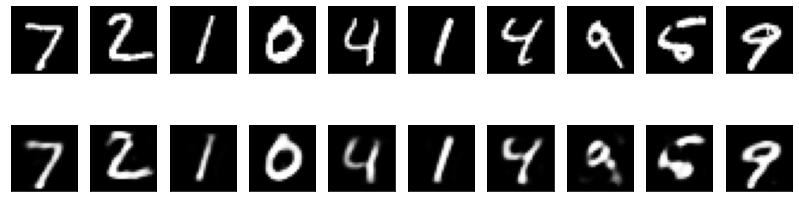

In [12]:
plt.figure(figsize=(14, 4))
for i in range(n):
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()